# ProtocolToAdjacencyExample

In [11]:
%matplotlib inline

In [26]:
from knesset_social_dynamics.parsers import commitees, graphs
import pathlib
import matplotlib.pyplot as plt
import random
import networkx as nx
import pandas as pd

# Choose a random committee file from the folder

In [13]:
committees_protocols_folder =  pathlib.Path('data/committee_protocols/')

In [14]:
random_committee_proto_path = random.choice(list(committees_protocols_folder.glob("*.doc")))

# Extract committee transcript

In [15]:
transcript = commitees.extract_committee_new_transcript(random_committee_proto_path)

2020-07-27 14:48:06.535 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal


# Build interrupt network

In [16]:
inter_graph = graphs.extract_transcript_graph(transcript, g_type='committee_breaking')

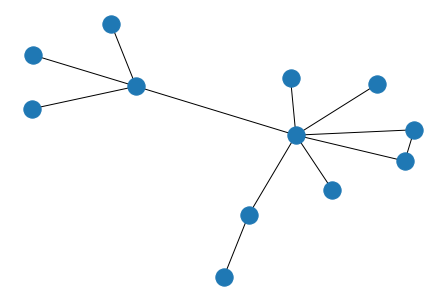

In [17]:
nx.draw(inter_graph)

# Extract adjacency matrix

In [18]:
adj_matrix = nx.convert_matrix.to_pandas_adjacency(inter_graph)

In [19]:
adj_matrix

,משה אבוטבול,עפר שלח,רוני גמזו,פטין מולא,מירב כהן,רוני עוזרי,טלי פלוסקוב,אירית לקסר,ערן שמואלי,אודי ליאון,יוליה מלינובסקי,ציפי נחשון גליק
משה אבוטבול,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
עפר שלח,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
רוני גמזו,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
פטין מולא,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
מירב כהן,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
רוני עוזרי,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
טלי פלוסקוב,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
אירית לקסר,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
ערן שמואלי,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
אודי ליאון,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# From transcript to local adjacency matrix

In [22]:
graphs.extract_transcript_adjacency(transcript, 'data/adjacency_matrixes/adjacency_example.csv')

# Extract attriburtes

In [28]:
all_km_metadata = pd.read_csv('data/knesset_members_metadata.csv')

In [38]:
adj_matrix.index

Index(['משה אבוטבול', 'עפר שלח', 'רוני גמזו', 'פטין מולא', 'מירב כהן',
       'רוני עוזרי', 'טלי פלוסקוב', 'אירית לקסר', 'ערן שמואלי', 'אודי ליאון',
       'יוליה מלינובסקי', 'ציפי נחשון גליק'],
      dtype='object')

In [40]:
relevant_names = []
relevant_data = []
for name in adj_matrix.index:
    first, last = name.split(" ")
    data = all_km_metadata[(all_km_metadata['FirstName'] == first) & (all_km_metadata['LastName'] == last)]
    if len(data) > 0:
        relevant_names.append(name)
        relevant_data.append(data)
    
    

ValueError: too many values to unpack (expected 2)